# diffractsim을 이용한 회절 시뮬레이션

In [ ]:
!pip install git+https://github.com/hjw4228/diffractsim.git

In [ ]:
!curl https://raw.githubusercontent.com/cubem10/diffractsim/964b8976cb241e5ff4605e597d708a1c66b1f124/examples/apertures/bahtinov_mask.jpg > mask.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35910  100 35910    0     0  93478      0 --:--:-- --:--:-- --:--:-- 93515


In [ ]:
!curl https://raw.githubusercontent.com/cubem10/diffractsim/main/examples/apertures/circle.jpg > circle.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16215  100 16215    0     0  43835      0 --:--:-- --:--:-- --:--:-- 43824


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import gc
gc.collect()

32

In [ ]:
import gc

import diffractsim
diffractsim.set_backend("CUDA")

from diffractsim import PolychromaticField, Lens, ApertureFromImage, cf, nm, mm, cm

def render_image(f, z, mask):
  F = PolychromaticField(
    spectrum = 4 * cf.illuminant_d65,
    extent_x = 15.*mm, extent_y = 15.*mm,
    Nx=1500, Ny=1500
  )
  if mask:
    F.add(ApertureFromImage("./mask.jpg", image_size=(5. *mm, 5.* mm), simulation=F))
  else:
    F.add(ApertureFromImage("./circle.jpg", image_size=(5. *mm, 5. *mm), simulation=F))

  F.add(Lens(f=f*cm))
  F.propagate(z=z * cm)

  rgb = F.get_colors()

  if mask:
    F.plot_colors(rgb, xlim=[-6*mm, 6*mm], ylim=[-6*mm, 6*mm], save_plot=True, filename=f'{f}_{z}_masked.jpg', hide_axis=True, text='')
    print(f'\nSuccessfully rendered masked image of f={f}cm, z={F.z * 100}cm')
  else:
    F.plot_colors(rgb, xlim=[-6*mm, 6*mm], ylim=[-6*mm, 6*mm], save_plot=True, filename=f'{f}_{z}_unmasked.jpg', hide_axis=True, text='')
    print(f'\nSuccessfully rendered unmasked image of f={f}cm, z={F.z * 100}cm')\

  return

In [ ]:
def render_all(start, end):
  for f in range(start, end+1):
    z = f-10
    for _ in range(1, 20):
      render_image(f, z, False)
      z += 1
    print(f'Collected garbage: {gc.collect()}')
    z = f-5

In [ ]:
!rm -rf *ed.jpg # 예전 이미지 지우기

In [ ]:
gc.collect()
render_all(75, 80)

Computation Took 1.4273185729980469



Successfully rendered unmasked image of f=75cm, z=65.0cm


Computation Took 1.2824206352233887



Successfully rendered unmasked image of f=75cm, z=66.0cm


Computation Took 1.28515625



Successfully rendered unmasked image of f=75cm, z=67.0cm


Computation Took 1.2888727188110352



Successfully rendered unmasked image of f=75cm, z=68.0cm


Computation Took 1.286881923675537



Successfully rendered unmasked image of f=75cm, z=69.0cm


Computation Took 1.2926907539367676



Successfully rendered unmasked image of f=75cm, z=70.0cm


Computation Took 1.292417287826538



Successfully rendered unmasked image of f=75cm, z=71.0cm


Computation Took 1.2979910373687744



Successfully rendered unmasked image of f=75cm, z=72.0cm


Computation Took 1.299663782119751



Successfully rendered unmasked image of f=75cm, z=73.0cm


Computation Took 1.300330400466919



Successfully rendered unmasked image of f=75cm, z=74.0cm


Computation Took 1.3035812377929688



Successfully rendered unmasked image of f=75cm, z=75.0cm


Computation Took 1.3016979694366455



Successfully rendered unmasked image of f=75cm, z=76.0cm


Computation Took 1.3028008937835693



Successfully rendered unmasked image of f=75cm, z=77.0cm


Computation Took 1.2987525463104248



Successfully rendered unmasked image of f=75cm, z=78.0cm


Computation Took 1.298222541809082



Successfully rendered unmasked image of f=75cm, z=79.0cm


Computation Took 1.2945265769958496



Successfully rendered unmasked image of f=75cm, z=80.0cm


Computation Took 1.2931098937988281



Successfully rendered unmasked image of f=75cm, z=81.0cm


Computation Took 1.2914493083953857



Successfully rendered unmasked image of f=75cm, z=82.0cm


Computation Took 1.2928905487060547



Successfully rendered unmasked image of f=75cm, z=83.0cm
Collected garbage: 986


Computation Took 1.2898244857788086



Successfully rendered unmasked image of f=76cm, z=66.0cm


Computation Took 1.2885806560516357



Successfully rendered unmasked image of f=76cm, z=67.0cm


Computation Took 1.2910370826721191



Successfully rendered unmasked image of f=76cm, z=68.0cm


Computation Took 1.2889587879180908



Successfully rendered unmasked image of f=76cm, z=69.0cm


Computation Took 1.2902536392211914



Successfully rendered unmasked image of f=76cm, z=70.0cm


Computation Took 1.287916660308838



Successfully rendered unmasked image of f=76cm, z=71.0cm


Computation Took 1.2886765003204346



Successfully rendered unmasked image of f=76cm, z=72.0cm


Computation Took 1.2881584167480469



Successfully rendered unmasked image of f=76cm, z=73.0cm


Computation Took 1.2875280380249023



Successfully rendered unmasked image of f=76cm, z=74.0cm


Computation Took 1.2900753021240234



Successfully rendered unmasked image of f=76cm, z=75.0cm


Computation Took 1.2877838611602783



Successfully rendered unmasked image of f=76cm, z=76.0cm


Computation Took 1.2889673709869385



Successfully rendered unmasked image of f=76cm, z=77.0cm


Computation Took 1.2886085510253906



Successfully rendered unmasked image of f=76cm, z=78.0cm


Computation Took 1.2870802879333496



Successfully rendered unmasked image of f=76cm, z=79.0cm


Computation Took 1.2902138233184814



Successfully rendered unmasked image of f=76cm, z=80.0cm


Computation Took 1.2878739833831787



Successfully rendered unmasked image of f=76cm, z=81.0cm


Computation Took 1.288564682006836



Successfully rendered unmasked image of f=76cm, z=82.0cm


Computation Took 1.2884840965270996



Successfully rendered unmasked image of f=76cm, z=83.0cm


Computation Took 1.2902734279632568



Successfully rendered unmasked image of f=76cm, z=84.0cm
Collected garbage: 1318


Computation Took 1.2907156944274902



Successfully rendered unmasked image of f=77cm, z=67.0cm


Computation Took 1.2886991500854492



Successfully rendered unmasked image of f=77cm, z=68.0cm


Computation Took 1.2914626598358154



Successfully rendered unmasked image of f=77cm, z=69.0cm


Computation Took 1.292046308517456



Successfully rendered unmasked image of f=77cm, z=70.0cm


Computation Took 1.2901809215545654



Successfully rendered unmasked image of f=77cm, z=71.0cm


Computation Took 1.2927947044372559



Successfully rendered unmasked image of f=77cm, z=72.0cm


Computation Took 1.2919936180114746



Successfully rendered unmasked image of f=77cm, z=73.0cm


Computation Took 1.2914130687713623



Successfully rendered unmasked image of f=77cm, z=74.0cm


Computation Took 1.2903797626495361



Successfully rendered unmasked image of f=77cm, z=75.0cm


Computation Took 1.288811445236206



Successfully rendered unmasked image of f=77cm, z=76.0cm


Computation Took 1.2909612655639648



Successfully rendered unmasked image of f=77cm, z=77.0cm


Computation Took 1.292034387588501



Successfully rendered unmasked image of f=77cm, z=78.0cm


Computation Took 1.2917187213897705



Successfully rendered unmasked image of f=77cm, z=79.0cm


Computation Took 1.290140151977539



Successfully rendered unmasked image of f=77cm, z=80.0cm


Computation Took 1.2909495830535889



Successfully rendered unmasked image of f=77cm, z=81.0cm


Computation Took 1.2923336029052734



Successfully rendered unmasked image of f=77cm, z=82.0cm


Computation Took 1.2894701957702637



Successfully rendered unmasked image of f=77cm, z=83.0cm


Computation Took 1.2914042472839355



Successfully rendered unmasked image of f=77cm, z=84.0cm


Computation Took 1.2918152809143066



Successfully rendered unmasked image of f=77cm, z=85.0cm
Collected garbage: 971


Computation Took 1.2926275730133057



Successfully rendered unmasked image of f=78cm, z=68.0cm


Computation Took 1.2910497188568115



Successfully rendered unmasked image of f=78cm, z=69.0cm


Computation Took 1.2926065921783447



Successfully rendered unmasked image of f=78cm, z=70.0cm


Computation Took 1.290048599243164



Successfully rendered unmasked image of f=78cm, z=71.0cm


Computation Took 1.2893362045288086



Successfully rendered unmasked image of f=78cm, z=72.0cm


Computation Took 1.2895264625549316



Successfully rendered unmasked image of f=78cm, z=73.0cm


Computation Took 1.2916011810302734



Successfully rendered unmasked image of f=78cm, z=74.0cm


Computation Took 1.2904324531555176



Successfully rendered unmasked image of f=78cm, z=75.0cm


Computation Took 1.2904958724975586



Successfully rendered unmasked image of f=78cm, z=76.0cm


Computation Took 1.289548397064209



Successfully rendered unmasked image of f=78cm, z=77.0cm


Computation Took 1.2922396659851074



Successfully rendered unmasked image of f=78cm, z=78.0cm


Computation Took 1.2877233028411865



Successfully rendered unmasked image of f=78cm, z=79.0cm


Computation Took 1.2896919250488281



Successfully rendered unmasked image of f=78cm, z=80.0cm


Computation Took 1.2903175354003906



Successfully rendered unmasked image of f=78cm, z=81.0cm


Computation Took 1.2880799770355225



Successfully rendered unmasked image of f=78cm, z=82.0cm


Computation Took 1.2916381359100342



Successfully rendered unmasked image of f=78cm, z=83.0cm


Computation Took 1.2909963130950928



Successfully rendered unmasked image of f=78cm, z=84.0cm


Computation Took 1.2899227142333984



Successfully rendered unmasked image of f=78cm, z=85.0cm


Computation Took 1.292860746383667



Successfully rendered unmasked image of f=78cm, z=86.0cm
Collected garbage: 1318


Computation Took 1.2920126914978027



Successfully rendered unmasked image of f=79cm, z=69.0cm


Computation Took 1.2908196449279785



Successfully rendered unmasked image of f=79cm, z=70.0cm


Computation Took 1.2915077209472656



Successfully rendered unmasked image of f=79cm, z=71.0cm


Computation Took 1.2885563373565674



Successfully rendered unmasked image of f=79cm, z=72.0cm


Computation Took 1.292506456375122



Successfully rendered unmasked image of f=79cm, z=73.0cm


Computation Took 1.290027141571045



Successfully rendered unmasked image of f=79cm, z=74.0cm


Computation Took 1.292292594909668



Successfully rendered unmasked image of f=79cm, z=75.0cm


Computation Took 1.29158616065979



Successfully rendered unmasked image of f=79cm, z=76.0cm


Computation Took 1.2926366329193115



Successfully rendered unmasked image of f=79cm, z=77.0cm


Computation Took 1.291377067565918



Successfully rendered unmasked image of f=79cm, z=78.0cm


Computation Took 1.289947509765625



Successfully rendered unmasked image of f=79cm, z=79.0cm


Computation Took 1.2921843528747559



Successfully rendered unmasked image of f=79cm, z=80.0cm


Computation Took 1.2894628047943115



Successfully rendered unmasked image of f=79cm, z=81.0cm


Computation Took 1.2928569316864014



Successfully rendered unmasked image of f=79cm, z=82.0cm


Computation Took 1.2909290790557861



Successfully rendered unmasked image of f=79cm, z=83.0cm


Computation Took 1.289421558380127



Successfully rendered unmasked image of f=79cm, z=84.0cm


Computation Took 1.29075288772583



Successfully rendered unmasked image of f=79cm, z=85.0cm


Computation Took 1.2923524379730225



Successfully rendered unmasked image of f=79cm, z=86.0cm


Computation Took 1.2889189720153809



Successfully rendered unmasked image of f=79cm, z=87.0cm
Collected garbage: 971


Computation Took 1.2899718284606934



Successfully rendered unmasked image of f=80cm, z=70.0cm


Computation Took 1.2904248237609863



Successfully rendered unmasked image of f=80cm, z=71.0cm


Computation Took 1.287968397140503



Successfully rendered unmasked image of f=80cm, z=72.0cm


Computation Took 1.290506362915039



Successfully rendered unmasked image of f=80cm, z=73.0cm


Computation Took 1.291358470916748



Successfully rendered unmasked image of f=80cm, z=74.0cm


Computation Took 1.2896614074707031



Successfully rendered unmasked image of f=80cm, z=75.0cm


Computation Took 1.2923130989074707



Successfully rendered unmasked image of f=80cm, z=76.0cm


Computation Took 1.2919650077819824



Successfully rendered unmasked image of f=80cm, z=77.0cm


Computation Took 1.291353702545166



Successfully rendered unmasked image of f=80cm, z=78.0cm


Computation Took 1.2909901142120361



Successfully rendered unmasked image of f=80cm, z=79.0cm


Computation Took 1.290238857269287



Successfully rendered unmasked image of f=80cm, z=80.0cm


Computation Took 1.291727066040039



Successfully rendered unmasked image of f=80cm, z=81.0cm


Computation Took 1.2919137477874756



Successfully rendered unmasked image of f=80cm, z=82.0cm


Computation Took 1.289247751235962



Successfully rendered unmasked image of f=80cm, z=83.0cm


Computation Took 1.2898046970367432



Successfully rendered unmasked image of f=80cm, z=84.0cm


Computation Took 1.2888305187225342



Successfully rendered unmasked image of f=80cm, z=85.0cm


Computation Took 1.2882177829742432



Successfully rendered unmasked image of f=80cm, z=86.0cm


Computation Took 1.2898218631744385



Successfully rendered unmasked image of f=80cm, z=87.0cm


Computation Took 1.2908554077148438

Successfully rendered unmasked image of f=80cm, z=88.0cm
Collected garbage: 986


In [ ]:
!zip data.zip *.jpg

  adding: 45_35_unmasked.jpg (deflated 52%)
  adding: 45_36_unmasked.jpg (deflated 52%)
  adding: 45_37_unmasked.jpg (deflated 51%)
  adding: 45_38_unmasked.jpg (deflated 51%)
  adding: 45_39_unmasked.jpg (deflated 51%)
  adding: 45_40_unmasked.jpg (deflated 50%)
  adding: 45_41_unmasked.jpg (deflated 49%)
  adding: 45_42_unmasked.jpg (deflated 49%)
  adding: 45_43_unmasked.jpg (deflated 47%)
  adding: 45_44_unmasked.jpg (deflated 46%)
  adding: 45_45_unmasked.jpg (deflated 46%)
  adding: 45_46_unmasked.jpg (deflated 45%)
  adding: 45_47_unmasked.jpg (deflated 44%)
  adding: 45_48_unmasked.jpg (deflated 43%)
  adding: 45_49_unmasked.jpg (deflated 43%)
  adding: 45_50_unmasked.jpg (deflated 41%)
  adding: 45_51_unmasked.jpg (deflated 41%)
  adding: 45_52_unmasked.jpg (deflated 40%)
  adding: 45_53_unmasked.jpg (deflated 39%)
  adding: 46_36_unmasked.jpg (deflated 51%)
  adding: 46_37_unmasked.jpg (deflated 51%)
  adding: 46_38_unmasked.jpg (deflated 51%)
  adding: 46_39_unmasked.jpg (de

# CNN 모델 구성하기

In [ ]:
import os
import cv2
X = []
y = []
for item in os.listdir():
    if 'unmasked' not in item: continue
    fig = cv2.imread(item)
    fig = fig[174:174+250, 174:174+250]
    X.append(fig/255)
    y.append(item.split('.')[0].split('_')[0])

In [ ]:
import numpy as np

X = np.array(X)
y = np.array(y, dtype='uint8')
print(X.shape, y.shape)

(684, 250, 250, 3) (684,)


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/Users/cubem10/venv-metal/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 222784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │     7,129,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,186,562 (27.41 MB)

 Trainable params: 7,186,562 (27.41 MB)

 Non-trainable params: 0 (0.00 B)

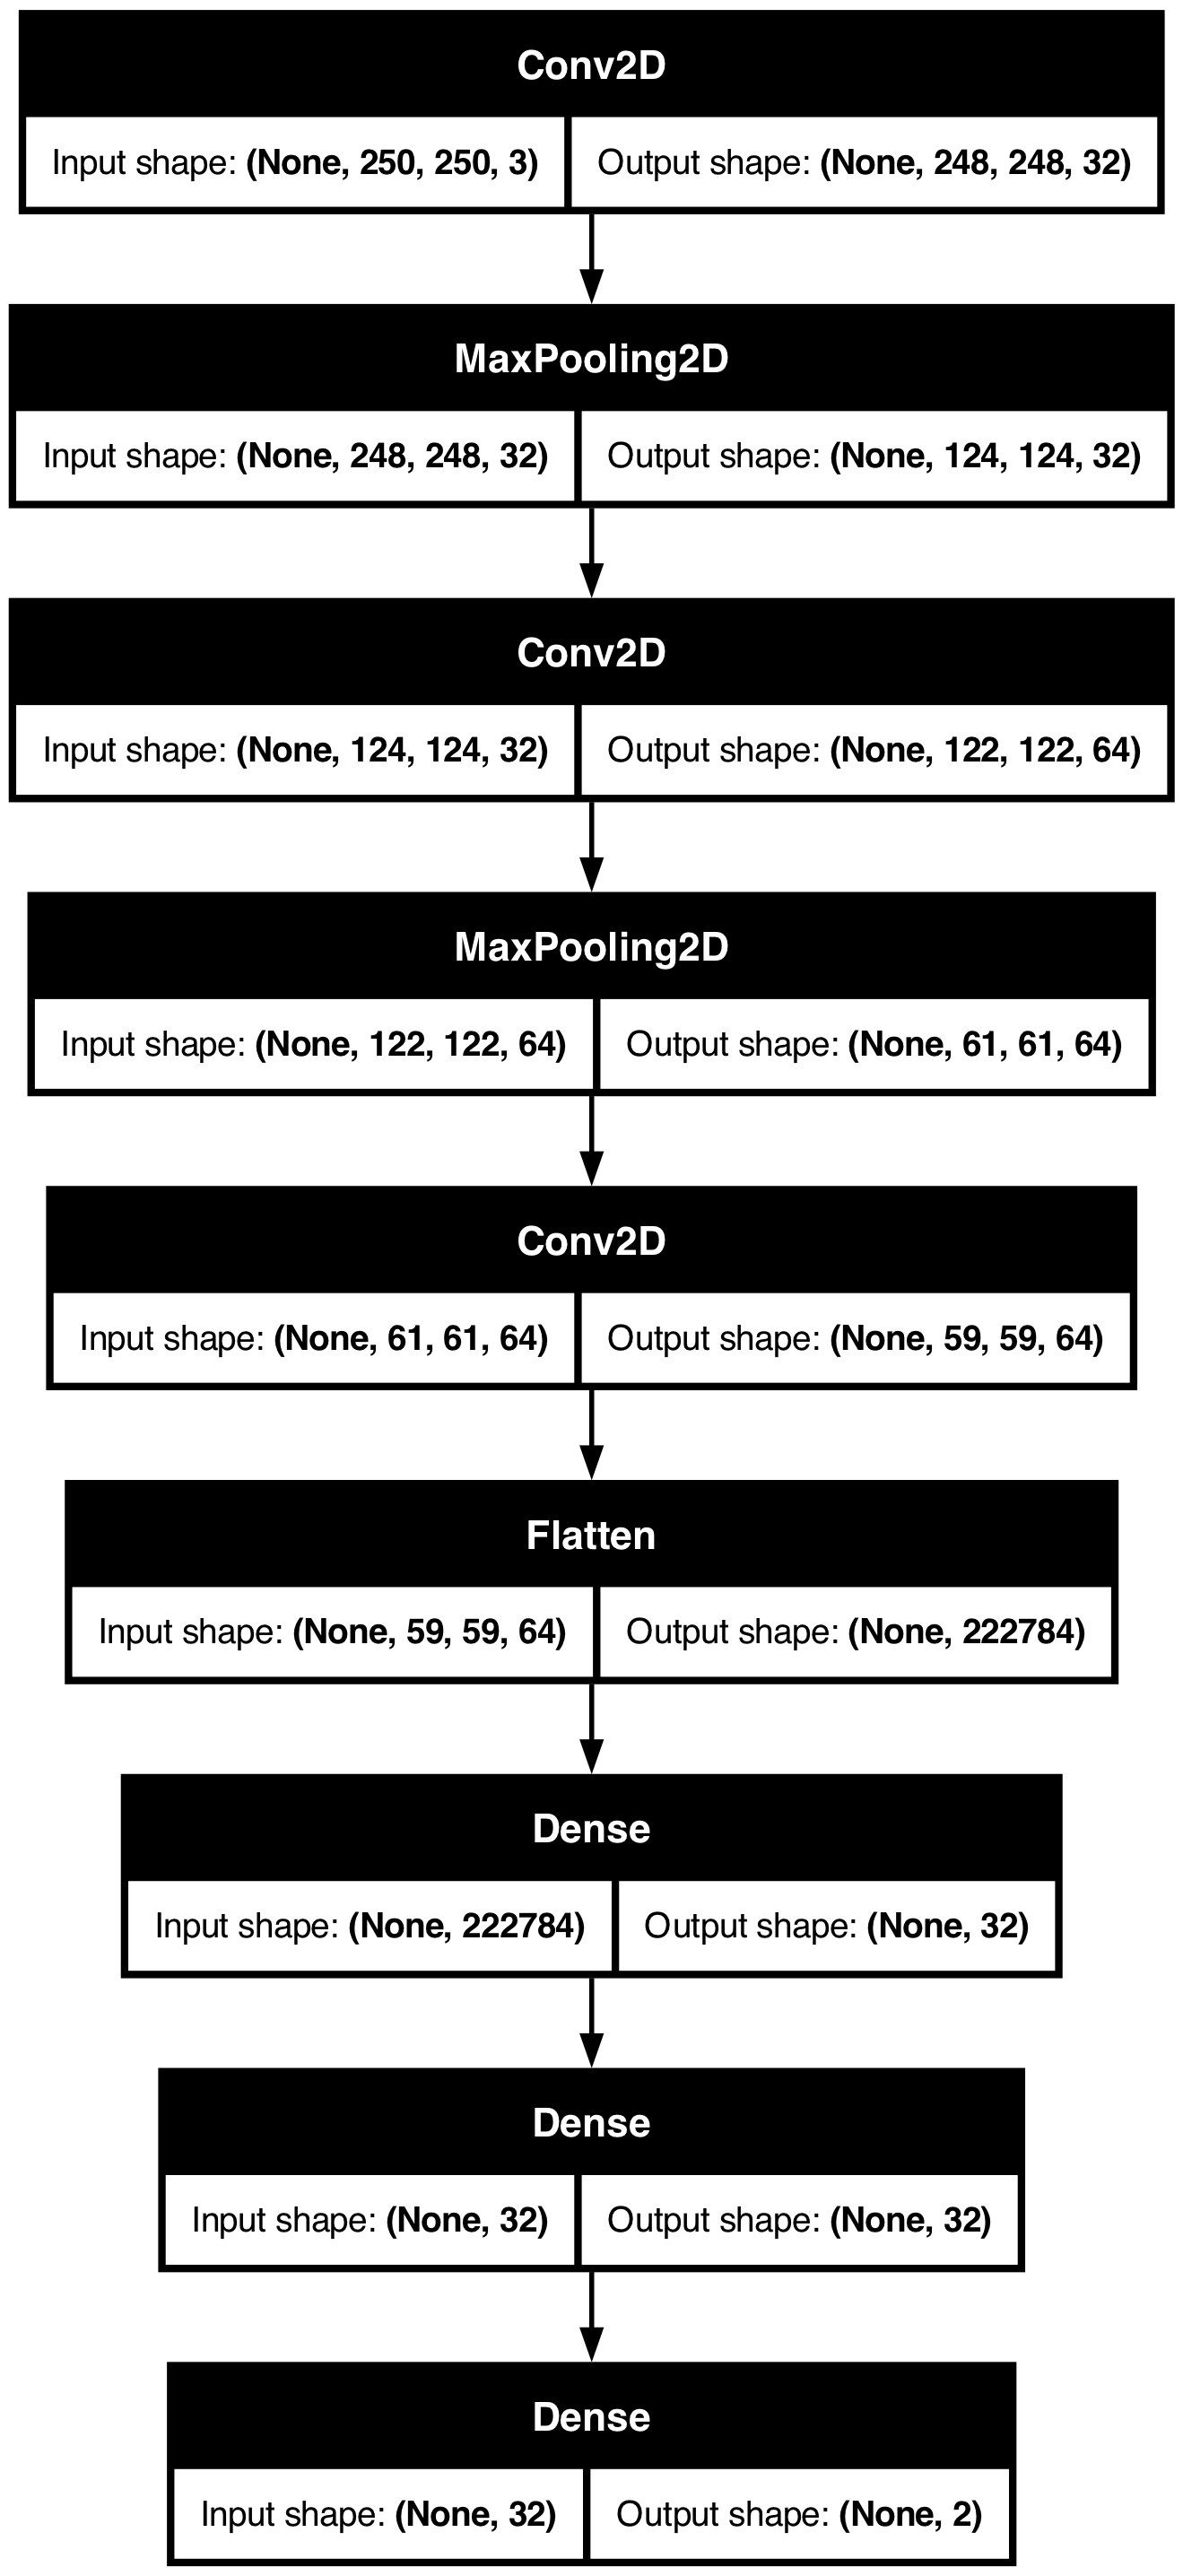

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), loss='mse', metrics=['mae', 'mse'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
history = model.fit(X_train, y_train, epochs=128, batch_size=20, validation_data=[X_test, y_test], callbacks=[early_stopping, reduce_lr])

Epoch 1/128
28/28 [==============================] - 3s 55ms/step - loss: 3961.5996 - mae: 62.1144 - mse: 3961.5996 - val_loss: 3896.3518 - val_mae: 61.4408 - val_mse: 3896.3518 - lr: 1.0000e-05
Epoch 2/128
28/28 [==============================] - 1s 37ms/step - loss: 3840.3054 - mae: 61.1397 - mse: 3840.3054 - val_loss: 3756.4082 - val_mae: 60.3056 - val_mse: 3756.4082 - lr: 1.0000e-05
Epoch 3/128
28/28 [==============================] - 1s 36ms/step - loss: 3678.2407 - mae: 59.8141 - mse: 3678.2407 - val_loss: 3572.3020 - val_mae: 58.7785 - val_mse: 3572.3020 - lr: 1.0000e-05
Epoch 4/128
28/28 [==============================] - 1s 37ms/step - loss: 3469.3105 - mae: 58.0655 - mse: 3469.3105 - val_loss: 3337.2681 - val_mae: 56.7692 - val_mse: 3337.2681 - lr: 1.0000e-05
Epoch 5/128
28/28 [==============================] - 1s 37ms/step - loss: 3210.0042 - mae: 55.8037 - mse: 3210.0042 - val_loss: 3053.8640 - val_mae: 54.2478 - val_mse: 3053.8640 - lr: 1.0000e-05
Epoch 6/128
28/28 [======

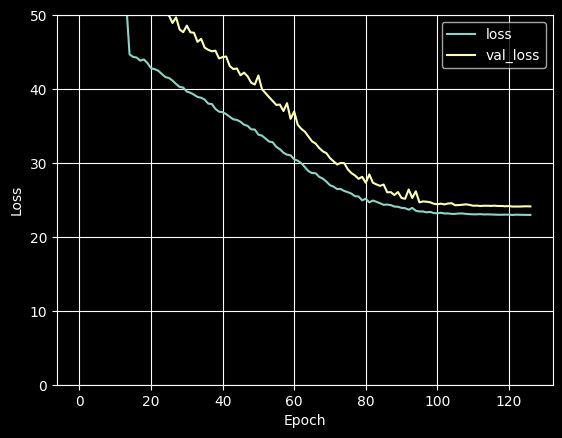

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig = cv2.imread('45_52_unmasked.jpg')
fig = np.array(fig[174:174+250, 174:174+250])
fig = fig / 255
test = np.array([fig])
model.predict(test)

1/1 [==============================] - 0s 74ms/step


array([[57.62058]], dtype=float32)